# Data Loading

In [253]:
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import torch
import os
from skimage import io, transform
import numpy as np
from torchvision import transforms, utils
import matplotlib.pyplot as plt
import time
import torch.nn as nn
import torchvision.datasets as datasets


In [270]:
class ProjectDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None, debug=False):
        self.label_info_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
        self.debug = debug

    def __len__(self):
        return len(self.label_info_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        label_img_name = self.label_info_frame.iloc[idx, 0]
        img_name = os.path.join(self.root_dir,
                                label_img_name)
        image = io.imread(img_name)
        label = self.label_info_frame.iloc[idx, 1]
        label = np.array([label])
        landmarks = label.astype('float').reshape(-1, 1)
        sample = {'image': image
                  ,'label': label
                  ,'name': label_img_name}

        if self.transform:
            sample = self.transform(sample)
            
        if self.debug:
            print(label_img_name)

        return sample

class Rescale(object):
    def __init__(self, output_size):
        assert isinstance(output_size, (int))
        self.output_size = output_size
        self.debug = False

    def __call__(self, sample):
        image, label = sample['image'], sample['label']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size, self.output_size * w / h

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))
        
        # Clipping or filling
        if new_w>self.output_size:
            mid = new_w//2
            new_w_start = mid-self.output_size//2
            new_w_end = mid+self.output_size//2
            
            if (new_w_end-new_w_start)<self.output_size:
                new_w_end += (self.output_size-(new_w_end-new_w_start))
            elif (new_w_end-new_w_start)>self.output_size:
                new_w_end -= ((new_w_end-new_w_start)-self.output_size)
            img = img[:, new_w_start:new_w_end]
        elif new_w<self.output_size:
            mid = new_w//2
            new_w_start = self.output_size//2-mid
            new_w_end = new_w_start+new_w
            filled_img = np.zeros((self.output_size, self.output_size, img.shape[2]))
            filled_img[:, new_w_start:new_w_end] = img[:, :]
            img = filled_img
        if self.debug:
            root_dir = dataset.root_dir 
            copy_dir = root_dir+'rescaled/'
            img_name = sample['name']
            if not os.path.isdir(copy_dir):
                os.mkdir(copy_dir)
            label_dir_name = img_name.split('\\')[0]
            label_dir_path = copy_dir + label_dir_name + '/'
            if not os.path.isdir(label_dir_path):
                os.mkdir(label_dir_path)
            path_to_rescaled_img = copy_dir + img_name
            io.imsave(path_to_rescaled_img, img, check_contrast=False)
        
        return {'image': img, 'label': label}


class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, label = sample['image'], sample['label']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        image = image.transpose((2, 0, 1))
        return {'image': torch.from_numpy(image),
                'label': torch.from_numpy(label)}

In [271]:
dataset = ProjectDataset(
    csv_file='D:/pravesh/Concordia/2021-Winter/COMP-6721-Intro_To_AI/project/comp-6721-project/label_info.csv'
    ,root_dir='D:/pravesh/Concordia/2021-Winter/COMP-6721-Intro_To_AI/project/1/dataset/images/')
print(len(dataset))

13


In [272]:
output_height = 512

scale = Rescale(output_height)

mask\0003.jpg (2002, 3000, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


mask\0003.jpg (512, 512, 3)


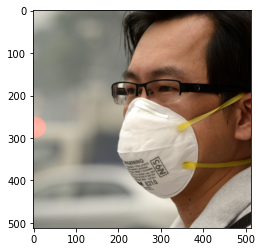

mask\0004.jpg (1048, 1500, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


mask\0004.jpg (512, 512, 3)


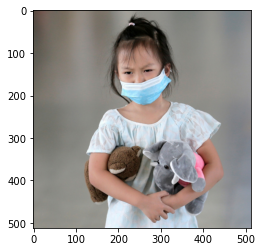

mask\0006.jpg (1063, 1600, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


mask\0006.jpg (512, 512, 3)


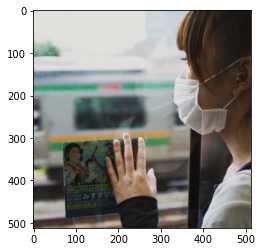

mask\0015.jpg (683, 1024, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


mask\0015.jpg (512, 512, 3)


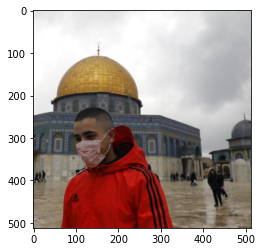

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


mask\0017.jpg (681, 1024, 3)
mask\0017.jpg (512, 512, 3)


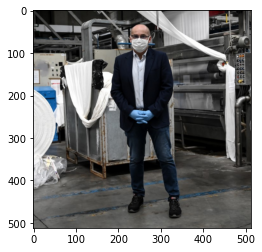

5.478871822357178
3000 2002 1024 681
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
0 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
1 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
2 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [273]:
import gc
gc.collect()

counts = np.zeros((100, ))
label_counts = {0: np.zeros((100, ))
                , 1: np.zeros((100, ))
                , 2:np.zeros((100, ))}

dataset.debug=False
scale.debug=True
t1 = time.time()
max_w, max_h = 0, 0
min_w, min_h = 1000000, 100000
count = 0
for k in range(5):
    sample = dataset[k]
    sample_image = sample['image']
    label = sample['label'][0]
    print(sample['name'], sample_image.shape)
    
    h, w, _ = sample_image.shape
    if w>max_w:
        max_w = w
    if h>max_h:
        max_h = h
    if w<min_w:
        min_w = w
    if h<min_h:
        min_h = h
    index = w//100
    counts[index]+=1
    label_counts[label][index]+=1
    
    transformed_sample = scale(sample)
    image = transformed_sample['image']
    print(sample['name'], image.shape)
    plt.figure()
#     image = image.astype(np.uint8)
    plt.imshow(image)
    plt.show()
    count+=1
    if count%100==0:
        gc.collect()
        print(count)
        print((time.time()-t1))
    
print((time.time()-t1))
print(max_w, max_h, min_w, min_h)
print(counts)
for key in label_counts:
    print(key, label_counts[key])

In [240]:
dataset_size = len(dataset)
X = np.zeros((dataset_size, output_height, output_height, 3), dtype=np.float32)
y = np.zeros((dataset_size, 1), dtype=np.int32)
for k in range(dataset_size):
    sample = dataset[k]
    sample_image, label = sample['image'], sample['label'][0]
    
    transformed_sample = scale(sample)
    image = transformed_sample['image']
    X[k] = image
    y[k] = label
np.savez_compressed('X.npz', X)
np.savez_compressed('y.npz', y)
print('Done converting to Numpy arrays')

TypeError: tuple indices must be integers or slices, not str

In [274]:
transformed_dataset = ProjectDataset(csv_file='D:/pravesh/Concordia/2021-Winter/COMP-6721-Intro_To_AI/project/comp-6721-project/label_info.csv'
                                     ,root_dir='D:/pravesh/Concordia/2021-Winter/COMP-6721-Intro_To_AI/project/1/dataset/images/'
                                     ,transform=transforms.Compose([
                                         Rescale(512)
                                         ,ToTensor()
                                     ]))
dataloader = DataLoader(transformed_dataset, batch_size=4,
                        shuffle=True, num_workers=0)

In [248]:
from PIL import Image

for data, label in enumerate(dataloader):
    print(data.shape, label.shape)
    # N*C*H*W, N
    break

TypeError: pic should be PIL Image or ndarray. Got <class 'tuple'>

# Modelling

In [265]:
class ProjectModel(nn.Module):
    def __init__(self):
        super(ProjectModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, stride=2)
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels = 32, kernel_size=3)
        self.linear = nn.Linear(in_features = 32*125*125, out_features=3)
        
    def forward(self, X):
        relu = nn.ReLU(inplace=False)
        X = self.conv1(X)
        X = relu(X)
        X = self.pool1(X)
        X = self.conv2(X)
        X = relu(X)
        X = torch.flatten(X, 1)
        print(X.shape)
        X = self.linear(X)
        return X

In [266]:
net = ProjectModel()
X = torch.randn((4, 3, 512, 512))
y_pred = net(X)
print(y_pred)

torch.Size([4, 500000])
tensor([[-0.2551,  0.1408, -0.1225],
        [-0.2936,  0.3017, -0.1121],
        [-0.2345,  0.3616, -0.1000],
        [-0.2777,  0.3280, -0.0276]], grad_fn=<AddmmBackward>)


In [ ]:
from sklearn import metrics as metrics

num_epoch = 2

net = ProjectModel()
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

epoch_acc_total = 0.0
for i in range(num_epoch):
    batch_acc_total = 0.0
    batch_iteration = 0
    for data, labels in dataloader:
        X, y = data, labels
        y_pred = model(X)
        l = loss(y_pred, y)
        model.zero_grad()
        l.backward()
        optimizer.step()
        if epoch == 1 or epoch % 500 == 0:
            print("Epoch %d had training loss %.4f" % (epoch, l.item()))
        acc = metrics.accuracy_score(y, y_pred, normalize=True)
        batch_iteration+=1
        batch_acc_total+=acc
        precision=metrics.precision_score(y, y_pred, average='weighted')
        batch_precision+=precision
        recall=metrics.recall_score(y, y_pred, average='weighted')
        batch_recall+=recall
        f1=metrics.f1_score(y, y_pred, average='weighted')
        batch_f1+=f1
    epoch_acc+=(batch_acc_total/batch_iteration)
    epoch_precision_total+=(batch_precision/batch_iteration)
    epoch_recall_total+=(batch_recall/batch_iteration)
    epoch_f1_total+=(batch_f1/batch_iteration)
epoch_acc = epoch_precision_total/num_epoch
epoch_precision = epoch_precision_total/num_epoch
epoch_recall = epoch_recall_total/num_epoch
epoch_f1 = epoch_f1_total/num_epoch
print(f'Training Accuracy:{epoch_acc}')
print(f'Training Precision:{epoch_precision}')
print(f'Training Recall:{epoch_recall}')
print(f'Training F1 Score:{epoch_f1}')

In [1]:
for data, labels in test_dataloader:
    X, y = data, labels
    y_pred = model(X)
    if epoch == 1 or epoch % 500 == 0:
        print("Epoch %d had training loss %.4f" % (epoch, l.item()))
    acc = metrics.accuracy_score(y, y_pred, normalize=True)
    precision=metrics.precision_score(y, y_pred, average='weighted')
    recall=metrics.recall_score(y, y_pred, average='weighted')
    f1=metrics.f1_score(y, y_pred, average='weighted')
print(f'Training Accuracy:{acc}')
print(f'Training Precision:{precision}')
print(f'Training Recall:{recall}')
print(f'Training F1 Score:{f1}')

NameError: name 'test_dataloader' is not defined